In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'1.10.0'

In [7]:
ls

 14-02-25-09:04.jpg
 academic/
 A.ipynb
 A.py
 camila/
 checkpoint
 Datos-procesados1.csv
 Datos-procesados.csv
 Dropbox.ipynb
 environment.yml
'first inference graph'/
 Fourier.ipynb
 frozen_inference_graph.pb
 imgaug.ipynb
 LICENSE
 model.ckpt.data-00000-of-00001
 model.ckpt.index
 model.ckpt.meta
 model.ipynb
 models/
'Object counting from images.ipynb'*
 README.md
 results/
 Scripts/
 test_labels/
'Time series analysis for the unemployment rate.ipynb'*
 train/
 training.ipynb
 train_labels/
 t.txt
 Untitled1.ipynb
 Untitled.ipynb
 val/


In [18]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('model.ckpt.meta')
    new_saver.restore(sess, 'model.ckpt')

    # Input tensor is the image
    image_tensor = tf.get_default_graph().get_tensor_by_name("image_tensor:0")

    # Output tensors are the detection boxes, scores, and classes
    # Each box represents a part of the image where a particular object was detected
    detection_boxes = tf.get_default_graph().get_tensor_by_name('detection_boxes:0')

    # Each score represents level of confidence for each of the objects.
    # The score is shown on the result image, together with the class label.
    detection_scores = tf.get_default_graph().get_tensor_by_name('detection_scores:0')
    detection_classes = tf.get_default_graph().get_tensor_by_name('detection_classes:0')

    # Number of objects detected
    num_detections = tf.get_default_graph().get_tensor_by_name('num_detections:0')

    image = cv2.imread('14-02-25-09:04.jpg')/255
    image = cv2.resize(image,(100, 68)) 
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image, axis=0)
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: image_expanded})

INFO:tensorflow:Restoring parameters from model.ckpt


In [19]:
image

array([[[0.70203922, 0.63145098, 0.63537255],
        [0.66297347, 0.60414994, 0.61983622],
        [0.64845445, 0.60431373, 0.61215686],
        ...,
        [0.08483387, 0.06640221, 0.06993172],
        [0.05928257, 0.05928257, 0.05928257],
        [0.0590519 , 0.0590519 , 0.0590519 ]],

       [[0.67807843, 0.62317647, 0.62709804],
        [0.67864591, 0.60021453, 0.61982238],
        [0.65599769, 0.59991926, 0.60815455],
        ...,
        [0.8329164 , 0.83213227, 0.83213227],
        [0.14958669, 0.14958669, 0.14958669],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.6673218 , 0.61946251, 0.60506343],
        [0.69064359, 0.6009181 , 0.63229065],
        [0.67843137, 0.61176471, 0.62739331],
        ...,
        [0.82515335, 0.82515335, 0.82515335],
        [0.91865051, 0.91865051, 0.91865051],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       ...,

       [[0.69798385, 0.64304729, 0.65090196],
        [0.7092618 , 0.62806231, 0.63982701],
        [0.68272207, 0

In [20]:
scores

array([[0.22318342, 0.22318259, 0.22318046, 0.2231773 , 0.2231769 ,
        0.22317061, 0.2180773 , 0.21739687, 0.21652819, 0.21205325,
        0.21025671, 0.20856102, 0.20855816, 0.20855784, 0.20855683,
        0.20855545, 0.20855485, 0.2057242 , 0.20139594, 0.20133866,
        0.20104897, 0.20104565, 0.20104562, 0.20104474, 0.2010421 ,
        0.20104085, 0.20064475, 0.20020714, 0.19949214, 0.19949211,
        0.199492  , 0.19949137, 0.1991514 , 0.19914879, 0.19914015,
        0.19914015, 0.19914015, 0.19914015, 0.19914015, 0.19886875,
        0.19886658, 0.19886616, 0.19886263, 0.19886263, 0.19885875,
        0.19884191, 0.1984134 , 0.1984067 , 0.19840643, 0.19840525,
        0.19827254, 0.19827023, 0.19826925, 0.19826844, 0.19805263,
        0.19792807, 0.19781299, 0.19781299, 0.19781299, 0.19781299,
        0.19773726, 0.19773397, 0.1977314 , 0.1977311 , 0.19773057,
        0.19772962, 0.19772919, 0.19772783, 0.19772777, 0.19772774,
        0.19772767, 0.19772725, 0.19772723, 0.19

In [10]:
h, w, _ = image.shape
scale = np.array([h, w, h, w]).reshape(1, 1, 4)

In [11]:
vox = boxes[0, 0, :] * scale
vox = vox[0, 0, :]
vox

array([ 5.25045946,  7.79405087, 17.39010429, 21.76323086])

In [12]:
#xmin, ymin, xmax, ymax 
params = vox[:2], vox[2] - vox[0], vox[3] - vox[1]
params

(array([5.25045946, 7.79405087]), 12.139644831418991, 13.96917998790741)

NameError: name 'patches' is not defined

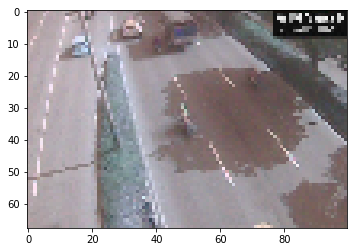

In [15]:
fig,ax = plt.subplots(1)
ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle(*params,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [14]:
import cv2
import numpy as np

In [31]:
th = 0.5

In [16]:
from matplotlib import pathces

ImportError: cannot import name 'pathces'